In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.2 (v3.3.2:d047928ae3f6, May 13 2013, 13:52:24) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
1.9.2
0.16.2


Now we’re going to dive into our first data set. I’m extremely excited because this is where things actually get fun! We’re going to encounter some real problems that you’ll likely experience all the time during your analysis and work.

So lets get started!

Let’s go ahead and open up the running_data.csv



We can do that with the read csv command provided by pandas. That’s going to read a data frame for us. That we can see right here.


You'll notice there are a lot of other formats that we can use. I'm not going to cover them but they are there.

In [4]:
df = pd.read_csv('../data/raw_running_data.csv')
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,Date,Miles,Time
0,8/2/14,1.70,NaN
1,8/3/14,1.40,NaN
2,8/4/14,2.10,NaN
3,8/6/14,2.38,NaN
4,8/7/14,2.30,NaN
5,8/8/14,3.40,NaN
6,8/9/14,2.50,NaN
7,8/10/14,3.36,0:28:37
8,8/11/14,1.67,0:13:07
9,8/12/14,1.42,0:10:35


In [5]:
?pd.read_csv()

You'll also notice that there are a TON of extra parameters that can be passed into this function, we can skip rows, specify dtypes, if there's compression or not, the index column, how many chunks or rows to read. This function could be a whole video itself. The important part is, when you're reading files, you've got a lot of options. You can do a lot of this processing after the fact and if you have any specific questions please don't hesistate to ask.

In [6]:
df.dtypes

Date      object
Miles    float64
Time      object
dtype: object


Now for a little background on this dataset. This is my exercise data from august 1st 2014 to January 1st 2015. During these several months I recorded the distance every time that I ran and recorded the time the majority of the time that took as well.


In [7]:
df.columns

Index(['Date', 'Miles', 'Time'], dtype='object')


Now we can see our 3 columns here, date, miles and time. We can see that we’ve got some NaN values when I didn’t record the time. We saw those in the head command above.

We’ve also go our index which is just numbered.

In [8]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
           dtype='int64')

Now pandas is absolutely fantastic with time series data. It’s got a ton of cool functionality but before we can get to that we’ve got to set our index as that time data.

In [9]:
df['Date'].head()

0    8/2/14
1    8/3/14
2    8/4/14
3    8/6/14
4    8/7/14
Name: Date, dtype: object

Now when we go to get our date Series, we can see that the dtype is object. That’s not write, we want something that’s date based. Specifically datetime64.

So let’s try and parse dates when we read in the csv. 

In [10]:
df = pd.read_csv('../data/raw_running_data.csv', parse_dates=['Date'])

In [11]:
df.Date.head()

0   2014-08-02
1   2014-08-03
2   2014-08-04
3   2014-08-06
4   2014-08-07
Name: Date, dtype: datetime64[ns]


Boom now we’ve got the correct dates. Now pandas is pretty good at parsing dates but occasionally it will mess them up. You may have to write a custom date parser but doing so is outside the scope of this course.

Let’s continue with our analysis.

Now that we’ve gotten our dates parsed, let’s try set the Dates as the index. You’ll see I’m using the inplace=True command. This is because typically pandas will try to return a new data frame rather than editing our current one. In place makes so that it edits the current one.

In [12]:
df.set_index('Date', inplace=True)


Let’s go ahead and plot it.



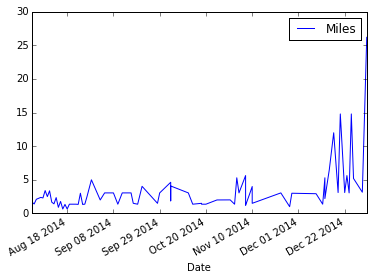

In [13]:
df.plot()

You’ll see that it prints what it can, it doesn’t understand what our time data is yet so it doesn’t plot it. We’ll address that a bit later.

In [14]:
?df.plot


Now you can see there are different ways of plotting this date. The default is line but we also have bar charts, or area charts, or density charts (with appropriate kinds of data).


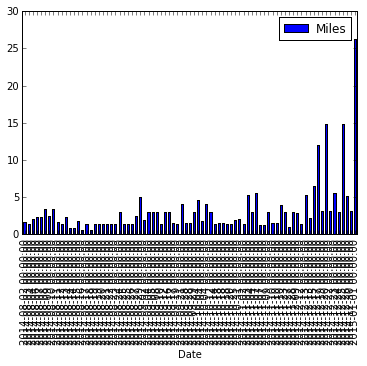

In [15]:
df.plot(kind='bar')

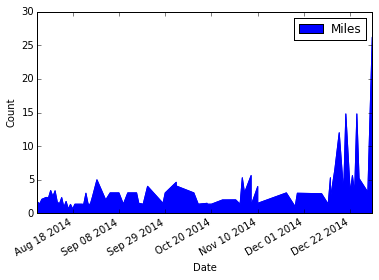

In [16]:
df.plot(kind='area')
plt.ylabel("Count")

Now by default pandas uses matplotlib to plot its graphs. Our first line in this notebook is a magic function that makes these matplotlib graphs be created in our notebook.

Now let's a print a complete table of the data

In [17]:
df

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07



Now that we’ve printed our the data in our data frame both as a graph and as a table. Let’s try summarizing it a bit better. We can do that better with the describe command. This is going to give us some basic summary statistics about our data, the number of points we have, the mean and standard deviation as well as min and max and quartiles.


In [18]:
df.describe()

,Miles
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


Now that we’ve described it, and when we look at the data itself.

I’m going to pause for a second to let you think about this, but basically there’s something that’s a bit irregular about this data. Go ahead and pause, try and explore it a bit and when you’re ready un pause the video.

Alright, think you’ve gotten it?

Well the problem is that our data is recorded on inconsistent days. You’ll see dates that have multiple entries and others that don’t have any entry at all. For instance November.

In [19]:
df['2014-11']

,Miles,Time
Date,,
2014-11-02,1.37,0:08:43
2014-11-03,5.30,0:39:26
2014-11-04,3.05,0:22:12
2014-11-07,5.63,0:49:05
2014-11-07,1.26,NaN
2014-11-07,1.20,NaN
2014-11-09,3.05,0:22:36
2014-11-10,1.50,0:09:00
2014-11-10,1.50,0:11:33


In [20]:
len(df['2014-11'])

13


This kind of thing comes up time and time again in data analysis. You’re analyzing some data trying to get patterns out of it, you notice some weird inconsistencies and then realize the data was collected in a strange way. However pandas makes it easy to fill in those gaps.

In [21]:
from datetime import datetime
start = datetime(2014,8,1)
end = datetime(2015,1,2)

In [24]:
start = df.index.min()
end = df.index.max()
print(start, end)

2014-08-02 00:00:00 2015-01-01 00:00:00


In [25]:
d = pd.DataFrame(index=pd.date_range(start, end))

We can also avoid importing datetime by just using the built in datetime function which creates one in the exact same way.

Now you might be wonder

In [26]:
pd.datetime(2014,8,1)

datetime.datetime(2014, 8, 1, 0, 0)

In [27]:
d.head()

""
2014-08-02
2014-08-03
2014-08-04
2014-08-05
2014-08-06


Of course there are multiple ways to perform this operation but I’m going to put it in as a join to illustrate and import concepts. Joins. A join is like a SQL join or a venn diagram.

In [28]:
from IPython.display import Image
Image(url='http://i.stack.imgur.com/GbJ7N.png')

In [29]:
df.join(d).head(10)

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07
2014-08-12,1.42,0:10:35


In [30]:
d.join(df).head(10)

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


In [31]:
df.join(d, how='outer')

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


In [32]:
df = df.join(d, how='outer')

So we performed an outer join. There are other kinds of joins like inner joins, left and right that you can look up in the documentation.

but now we’ve got a new problem, we’ve got a bunch of NaN values in our Miles column, luckily those are easy to fix. Go ahead and pause and try to fix this in your own.



In [33]:
df.head()

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN


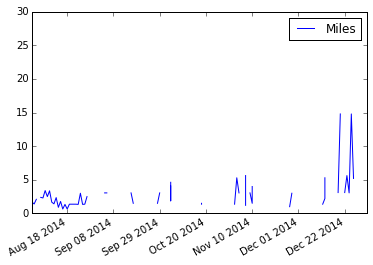

In [34]:
df.plot()


Alright, now remember we’re just going to use the fillna method to fill it in. Since we’re going to assume I ran 0 miles on those days. We just fill it with 0 and do it inplace. Now our plot looks much better.

In [35]:
df.Miles.fillna(0,inplace=True)

In [36]:
df.head()

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,0.00,NaN
2014-08-06,2.38,NaN


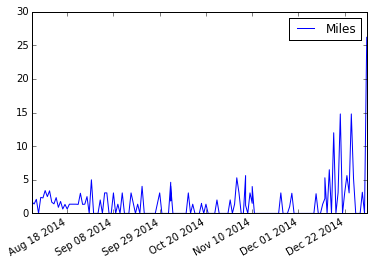

In [37]:
df.plot()

Let’s go ahead and save our work thus far. Doing this is extremely easy. We just specify the location and save a CSV. You can see there are numerous other “to” methods to save to different file formats. I'm not going to cover these in detail but they are there.

In [38]:
df.to_csv('../data/date_fixed_running_data.csv')

At this point we’ve covered a lot. We’ve cleaned up a dataset, learned how to parse dates and perform basic joins along indexes. We’ve learned some basic plotting and basic data descriptions. We also know how to read in csvs and save them for later.

In our next video we’ll be fixing up our time data and running some more specific queries. Like Rolling means and month by month analysis.